USDA 

In [6]:
"""Import statements."""
import itertools
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import re
from wordcloud import WordCloud
%matplotlib inline

In [2]:
dbfile = 'F:/Data/nutrients_database.sqlite'
conn = sqlite3.connect(dbfile)

foods = pd.read_sql_query('SELECT * from food', conn)
foodNames = foods['name'].values

conn.close()

In [3]:
def splitNameIntoWords(nameList):
    """Split food name into list of words."""
    matchString = '[^\W\d]*'
    words = [list(filter(None, re.findall(matchString, name))) for name in nameList]
    return words

In [12]:
wordsInFoods = splitNameIntoWords(foodNames)
allWords = list(itertools.chain(*wordsInFoods))
wordcounts = pd.Series(allWords).value_counts()
wordcounts.index = wordcounts.index.map(str.lower)
unfun_words = ['upc', 's', 'with', 'and', 'in', 'a', 'gtin', 'to', 'of']
wordcounts.drop(unfun_words, inplace=True)

In [5]:
xx, yy = np.meshgrid(np.linspace(-10, 10, num=1600), np.linspace(-10, 10, num=1600))
mask = np.square(xx) + np.square(yy * 1.1) > 95
mask = mask.astype('uint8')*255  # WordCloud wants mask as uint8 with disallowed pixels == 255

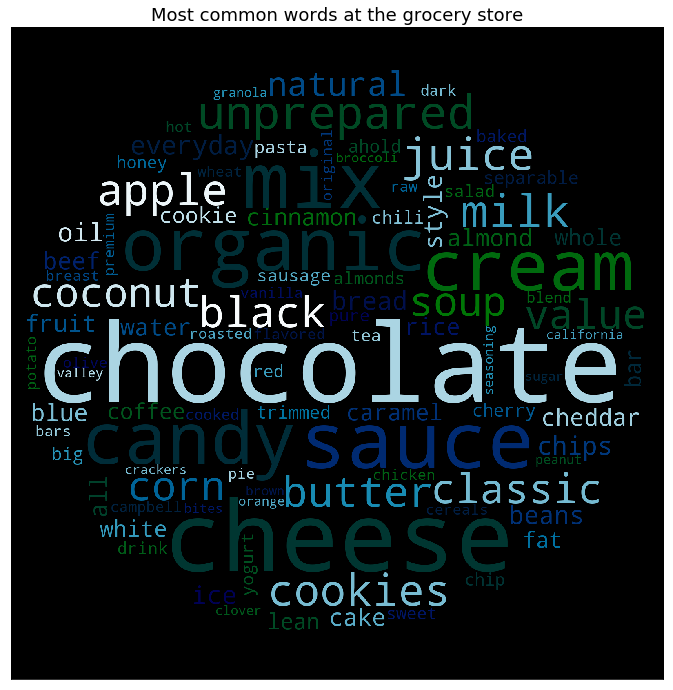

In [13]:
wcloud = WordCloud(width=1600, height=1600, mask=mask, colormap='ocean').generate_from_frequencies(wordcounts[:100].to_dict())
plt.rcParams["figure.figsize"] = (12, 12)
fig, ax = plt.subplots(1)
ax.imshow(wcloud)
ax.xaxis.set(ticks=[])
ax.yaxis.set(ticks=[])
plt.title('Most common words at the grocery store', fontdict={'fontsize': 18})
# plt.savefig('most_common_words.png', dpi=300, bbox_inches='tight')
plt.show()